# New York Cty Airbnb Open Data

- 데이터 셋 :  https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

- 뉴욕시 에어비앤비에 전시된 여러 공간의 변수들을 통해 적당한 '이용료'를 파악-분류하고자 하는 데이터 셋이다.

## 라이브러리 설정 및 데이터 읽어들이기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('AB_NYC_2019.csv')

pd.set_option('display.max_columns', None)

In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- last_review 와 reviews_per_month 숫자가 같은것으로 보아 동일한 개수의 데이터일 듯 하다.

In [11]:
(df['number_of_reviews'] == 0).sum()

10052

- number of reviews가 0인 데이터가 10052인것으로 보아 해당 데이터가 last_review, reviews_per_month가 결측되어 있음을 알 수 있다.

In [6]:
# 곱셉 기능을 통해 True False 유무 확인. & 기능을 통해 True False 확인.
(df['reviews_per_month'].isna() & df['last_review'].isna()).sum()

10052

- 10052로 null 값 생성. 즉 두 변수가 가지고 있는 결측치의 인덱스가 동일

## EDA 및 기초통계 분석

### 불필요한 column 제거

- ID, host_name, latitude, longitude은 직관적으로 가격에 영향을 및지 않을 것 같음. 위도와 경도의 경우 다를 수 있겠으나 일단 제거.
- name 역시 자연어 처리를 통해 유의미한 결과값을 뽑아낼 수 있겠으나 일단 EDA - 데이터 분석을 위해 제거.
- 리뷰관련된 변수의 경우 리뷰의 유무라는 새로운 변수 생성가능. 이용 가능 일수 역시 0일(이용 일수 미입력)이라는 변수 새롭게 생성 가능

In [5]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

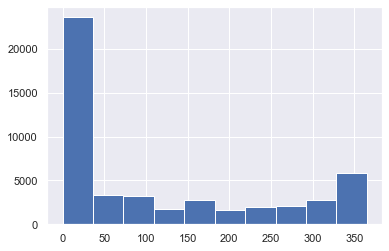

In [7]:
df['availability_365'].hist()

In [8]:
# 이용 가능 일수가 0인 데이터. 

(df['availability_365'] == 0).sum()

17533

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- 가격의 경우 최소가격과 최대가격의 설정이 잘못 되었다. 최소 숙박일수 역시 최대값이 잘못 설정되었다.

In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

In [14]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 수치형 데이터

- 수치형 데이터를 통해서만 price를 예측할 수 있을까?

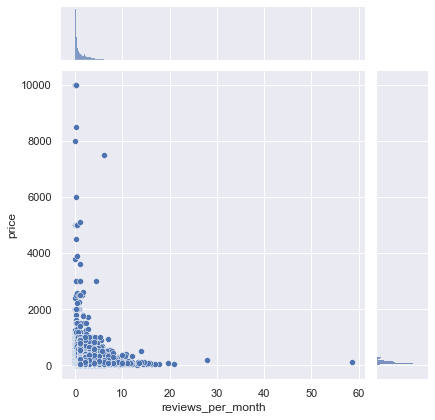

In [15]:
sns.jointplot(data=df, x='reviews_per_month', y='price')

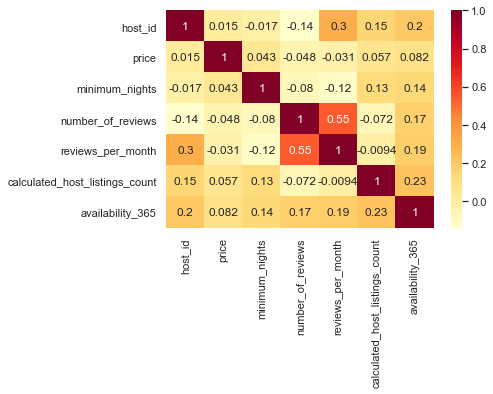

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

- 전처리가 되어 있지 않아서 상관성을 파악하기 어렵다.
- 의외로 host_id가 상관성이 있어보이는데 사용일수와 0.2, 한달동안 리뷰는 0.3 으로 확인할 수 있다.
- 새롭게 운영하는 사람일수록 큰 숫자의 id를 가지고 있고 새 시설인 만큼 리뷰도 많이 받고 오래 이용할 수 있기 때문인지 확인이 더 필요하다.
- host_id에 있어서 누적리뷰와 한달동안 받는 리뷰가 다른 상관성을 띈다.

### 범주형 데이터

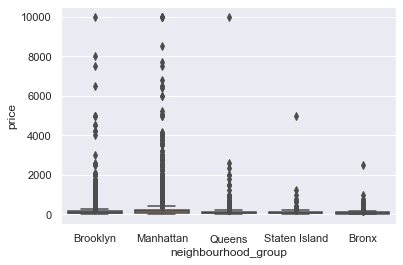

In [18]:
sns.boxplot(data=df, x='neighbourhood_group', y='price')

- 최대값이외에도 평균 기준값을 훨씬 초과하는 아웃라이어 price 값들이 있어서 확인하기 어렵다. 전처리 필요

## 데이터 전처리

### 범주형 데이터 전처리

In [19]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [20]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Fort Wadsworth           1
New Dorp                 1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

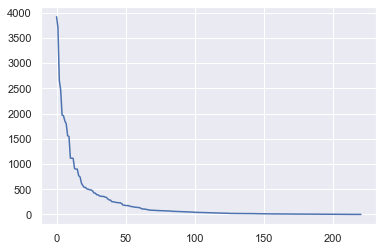

In [21]:
plt.plot(range(len(df['neighbourhood'].value_counts())), df['neighbourhood'].value_counts())

- 소수의 값 제거를 위해 50번째 이전 value 값만 잔존시킴.

In [23]:
ne = df['neighbourhood'].value_counts()[50:]

In [24]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s : s if str(s) not in ne[50:] else 'others')

### 수치형 데이터 전처리

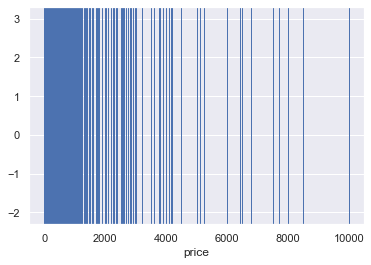

In [25]:
sns.rugplot(data=df, x='price', height=1)

In [30]:
print(df['price'].quantile(0.99))
print(df['price'].quantile(0.005))

799.0
26.0


- price값 상위 1% 가 799달러 즉, 1000달러 이후의 데이터는 아웃라이어 값으로 판단할 수 있다.
- price값 하위 아웃라이어 값 제거를 위해 0.5% 제거, 상위는 5% 제거

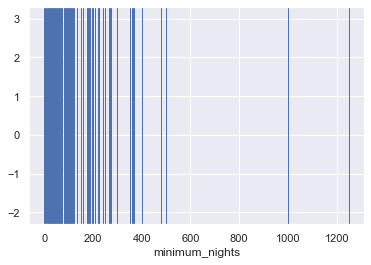

In [28]:
sns.rugplot(data=df, x='minimum_nights', height=1)

In [31]:
print(df['minimum_nights'].quantile(0.98))
print(df['minimum_nights'].quantile(0.005))

30.0
1.0


- minimum_nights 경우 최소값은 자를 필요가 없고 상위 2%정도로 자르면 될 듯 하다.

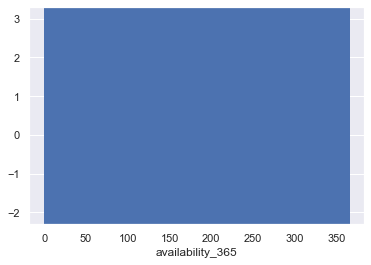

In [33]:
sns.rugplot(data=df, x='availability_365', height=1)

In [34]:
df['availability_365'].quantile(0.3)

0.0

- 30% 까지 0이라는 것은 미입력된 데이터가 상당하다는 뜻으로 차라리 이용일수가'0'인 새로운 범주형변수를 생성하는것이 효율적으로 보인다.

In [35]:
p1= df['price'].quantile(0.95)
p2= df['price'].quantile(0.005)

df = df[(p1 > df['price']) & (df['price'] > p2)]

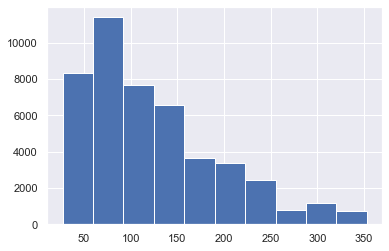

In [36]:
df['price'].hist()

In [37]:
df['minimum_nights'].quantile(0.98)

30.0

- price에서 아웃라이어 제거해도 상위 2%값 변하지 않음. 그대로 진행해도 좋다.

In [38]:
m1 = df['minimum_nights'].quantile(0.98)
df = df[df['minimum_nights'] < m1 ]

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'avail_zero', 'review_exists','last_review','price'], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

# last_review 경우 수치형이긴 하지만 날짜형태

### 범주형 데이터 전처리

In [40]:
# availability_365 중 새로운 범주형 변수 생성

df['avail_zero'] = df['availability_365'].apply(lambda x : 'Zero' if x==0 else 'NonZero')

In [42]:
# review 중 Null 값 채우기.

df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x: 'No' if x is True else 'Yes')

df.fillna(0, inplace=True) # 현재 미기입은 리뷰만 있음.

In [43]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'avail_zero', 'review_exists'],
      dtype='object')

In [46]:
X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'avail_zero', 'review_exists']]
X_cat = pd.get_dummies(X_cat)

# 선형회귀일 경우 get dummies 실행시 drop_first 그라디언트 부스트 사용시 X.

In [47]:
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [48]:
X.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bensonhurst,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bushwick,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Civic Center,neighbourhood_Clinton Hill,neighbourhood_Cobble Hill,neighbourhood_Concourse,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_Ditmars Steinway,neighbourhood_Downtown Brooklyn,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Gravesend,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kensington,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Little Italy,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Maspeth,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Morningside Heights,neighbourhood_Mott Haven,neighbourhood_Murray Hill,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_Ozone Park,neighbourhood_Park Slope,neighbourhood_Port Morris,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Queens Village,neighbourhood_Red Hook,neighbourhood_Rego Park,neighbourhood_Richmond Hill,neighbourhood_Ridgewood,neighbourhood_Rockaway Beach,neighbourhood_Roosevelt Island,neighbourhood_Rosedale,neighbourhood_Sheepshead Bay,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Springfield Gardens,neighbourhood_St. Albans,neighbourhood_St. George,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Tribeca,neighbourhood_Two Bridges,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,avail_zero_NonZero,avail_zero_Zero,review_exists_No,review_exists_Yes
0,-0.848227,-0.588004,-0.352358,-0.588299,0.066069,2.132586,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,-0.848227,-0.588004,0.419649,-0.485721,-0.084134,2.052616,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,-0.848204,-0.119342,-0.545360,-0.715013,-0.121684,2.132586,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,-0.848200,-0.588004,5.244692,2.084766,-0.121684,0.765095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### 학습 및 테스트 데이터 분리

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 분류하기 -  XGBoost Regression 모델 적용

In [51]:
from xgboost import XGBRegressor

model_reg =XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### 모델 평가

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

34.158105898456235
48.339277624918665


- 낮은 값인지 높은값인지 직관적으로 쉬이 알기 어렵다.

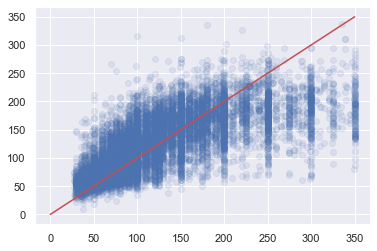

In [54]:
plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0,350], [0,350], 'r-')

- price 값의 경우 단위별로 나누어져 있는 경우가 많아 구간별로 나누어진다.
- 값이 낮을때는 overestimate 높을 경우는 underestimate 하는 현상이 일어남.

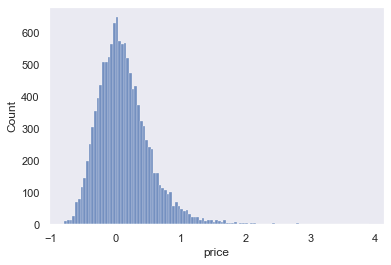

In [56]:
err = (pred - y_test) / y_test
sns.histplot(err)
plt.grid()